In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [49]:
customer_5 = df["Dependents"]

In [51]:
customer_15 = df.columns[14]

In [53]:
senior_male_electronic = df[(df['gender']=="Male") & (df['SeniorCitizen']==1) & (df["PaymentMethod"]=="Eelectronic check")]

In [55]:
print(senior_male_electronic.head())

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [57]:
df['SeniorCitizen'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: SeniorCitizen, dtype: int64

In [59]:
print(df['SeniorCitizen']==1)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: SeniorCitizen, Length: 7043, dtype: bool


In [61]:
customer_total_tenure = df[(df["tenure"]>70) & (df["MonthlyCharges"]>100.00)]

In [63]:
df['Contract'].head(30)

0     Month-to-month
1           One year
2     Month-to-month
3           One year
4     Month-to-month
5     Month-to-month
6     Month-to-month
7     Month-to-month
8     Month-to-month
9           One year
10    Month-to-month
11          Two year
12          One year
13    Month-to-month
14    Month-to-month
15          Two year
16          One year
17          Two year
18    Month-to-month
19    Month-to-month
20    Month-to-month
21          One year
22    Month-to-month
23          Two year
24    Month-to-month
25    Month-to-month
26    Month-to-month
27    Month-to-month
28          Two year
29    Month-to-month
Name: Contract, dtype: object

In [65]:
two_mail_yes = df[(df["Contract"]=="Two year") & (df["PaymentMethod"]=="Mailed Check") & (df["Churn"]=="Yes")]

In [67]:
customer_333 = df.sample(n=333, random_state=42)


In [69]:
churn_count = df["Churn"].value_counts()
print(churn_count)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


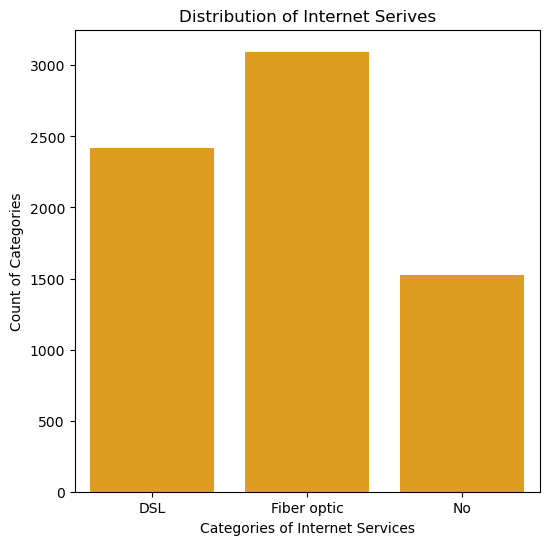

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x="InternetService",color="orange")
plt.title("Distribution of Internet Serives")
plt.xlabel("Categories of Internet Services")
plt.ylabel("Count of Categories")
plt.show()

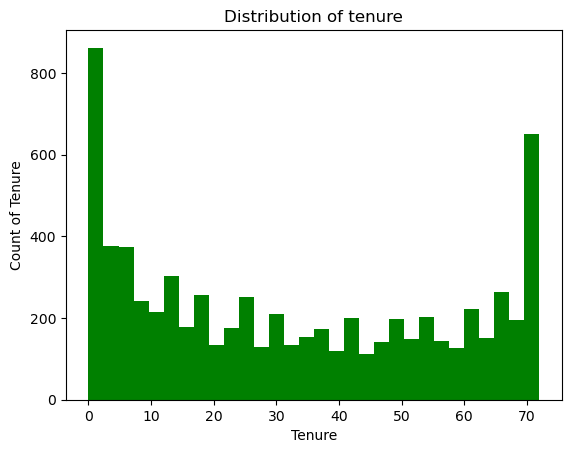

In [72]:
plt.hist(df["tenure"],bins=30, color="green")
plt.xlabel("Tenure")
plt.ylabel("Count of Tenure")
plt.title("Distribution of tenure")
plt.show()

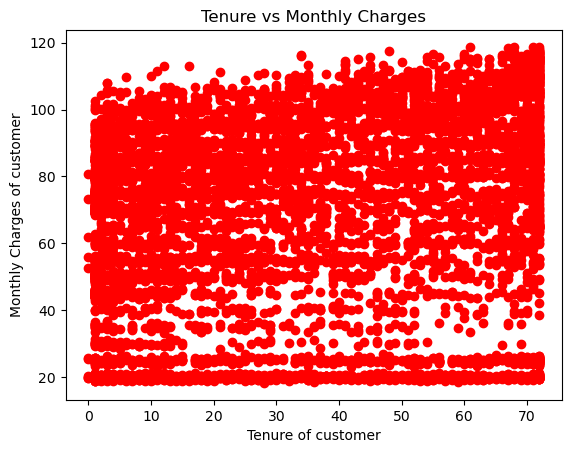

In [74]:
plt.scatter(df["tenure"],df["MonthlyCharges"],color="red")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

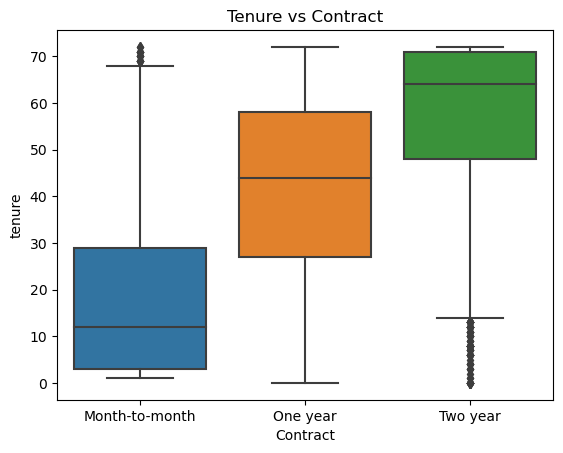

In [77]:
sns.boxplot(x="Contract",y="tenure",data=df)
plt.title("Tenure vs Contract")
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score

In [93]:
x=df[["tenure"]]
y=df["MonthlyCharges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root mean squared error: ",rmse)
error=y_test-y_pred
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': error
})
print(results_df)

Root mean squared error:  29.07936015646814
      Actual  Predicted      Error
185    24.80  55.106590 -30.306590
2715   25.25  67.435209 -42.185209
3825   19.35  70.825579 -51.475579
1807   76.35  55.106590  21.243410
132    50.55  75.448812 -24.898812
...      ...        ...        ...
5522   70.15  55.106590  15.043410
6377   44.65  55.106590 -10.456590
5500   60.50  73.291303 -12.791303
2392   90.70  60.962684  29.737316
6705   51.10  61.579115 -10.479115

[2113 rows x 3 columns]


In [97]:
a=df[["MonthlyCharges"]]
b=df["Churn"]
a_train,a_test,b_train,b_test= train_test_split(a,b,test_size=0.35,random_state=42)
model=LogisticRegression()
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
conf_matrix = confusion_matrix(b_test,b_pred)
acc_score = accuracy_score(b_test,b_test)
print("Confusion_matrix")
print(conf_matrix)
print("Accuracy_Score: ",acc_score)

Confusion_matrix
[[1797    0]
 [ 669    0]]
Accuracy_Score:  1.0


In [105]:

X_multi = df[['tenure', 'MonthlyCharges']]
y_multi = df['Churn']


X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


multi_log_model = LogisticRegression()
multi_log_model.fit(X_train_multi, y_train_multi)
y_pred_multi = multi_log_model.predict(X_test_multi)

conf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

print("\nConfusion Matrix (Multiple):")
print(conf_matrix_multi)
print(f"Accuracy (Multiple): {accuracy_multi:.2f}")



Confusion Matrix (Multiple):
[[944  92]
 [193 180]]
Accuracy (Multiple): 0.80


In [117]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
X = df[['tenure']]  # Independent variable
y = df['Churn']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Build the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# c. Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[951  85]
 [257 116]]
Accuracy: 0.76


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
X = df[['tenure', 'MonthlyCharges']]  # Independent variables
y = df['Churn']                       # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# b. Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# c. Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[1341  198]
 [ 308  266]]
Accuracy: 0.76
